In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
pd.pandas.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('Fish_dataset.csv')
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
84,Perch,125.0,19.0,21.0,22.5,5.6925,3.6675
19,Bream,650.0,31.0,33.5,38.7,14.4738,5.7276
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
119,Perch,850.0,36.9,40.0,42.3,11.9286,7.1064
94,Perch,150.0,21.0,23.0,24.5,5.2185,3.6260
28,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250


In [3]:
#changeing feature names
df.rename(columns={'Length1':'LengthVer','Length2':'LengthDia','Length3':'LengthCro'},inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# 1. Plot a bar chart showing count of individual species?

In [4]:
isp=df['Species'].value_counts()
isp=pd.DataFrame(isp)
isp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


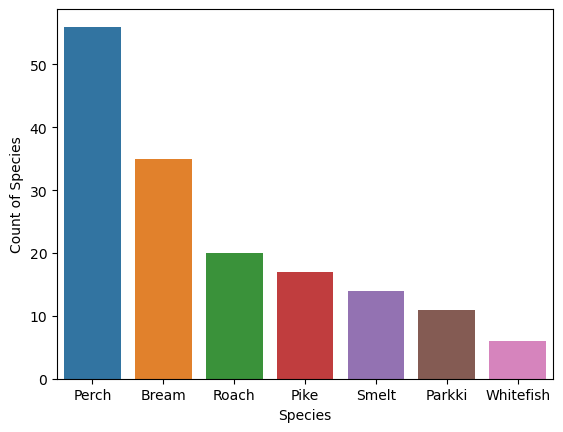

In [5]:
sns.barplot(x=isp.index,y=isp['Species'])
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.show()

#  2. Identify outliers and remove if any?

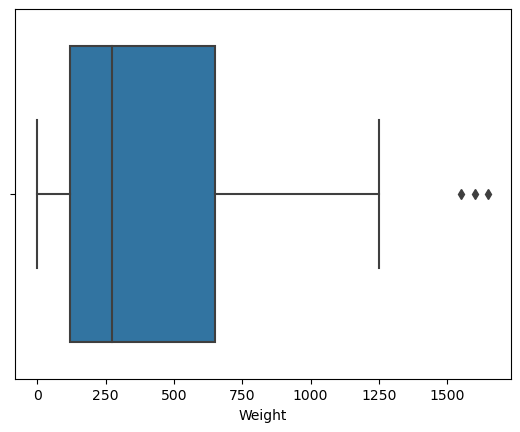

In [6]:
sns.boxplot(x=df['Weight']);

In [7]:
dfw=df['Weight']
dfw_q1 = dfw.quantile(0.25)
dfw_q3 = dfw.quantile(0.75)
dfw_iqr = dfw_q3 - dfw_q1
dfw_lowerend=dfw_q1-(1.5*dfw_iqr)
dfw_upperend=dfw_q3+(1.5*dfw_iqr)

In [8]:
dfw_outlier = dfw[(dfw<dfw_lowerend)|(dfw>dfw_upperend)]
dfw_outlier

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [9]:
df1=df.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


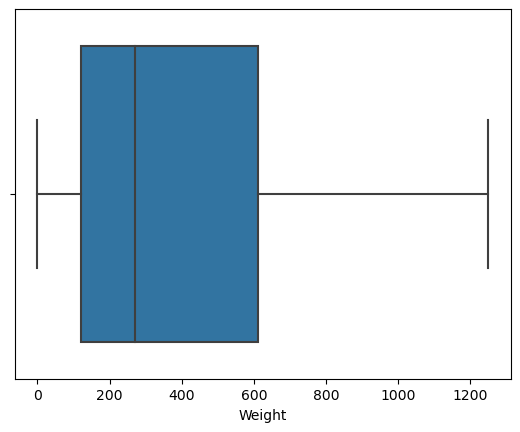

In [10]:
sns.boxplot(x=df1['Weight']);

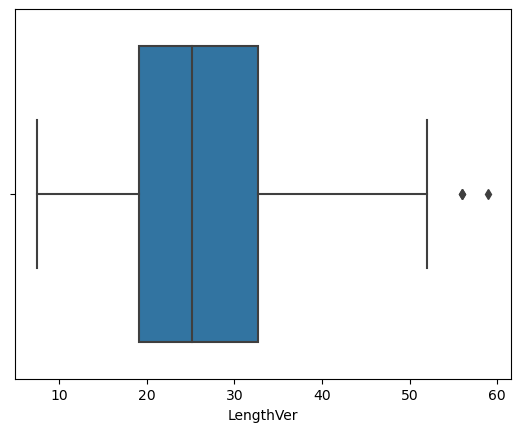

In [11]:
sns.boxplot(x=df['LengthVer']);

In [12]:
dflv = df['LengthVer']
dflv_q1 = dflv.quantile(0.25)
dflv_q3 = dflv.quantile(0.75)
dflv_iqr = dflv_q3 - dflv_q1
dflv_lowerend = dflv_q1-(1.5 * dflv_iqr)
dflv_upperend = dflv_q3+(1.5 * dflv_iqr)
dflv_outlier = dflv[(dflv <dflv_lowerend)|(dflv > dflv_upperend)]
dflv_outlier

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

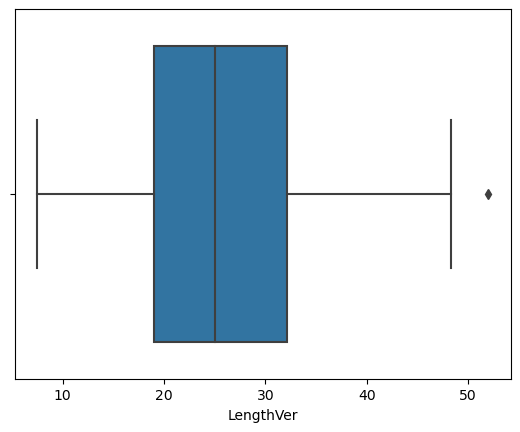

In [13]:
sns.boxplot(x=df1['LengthVer']);

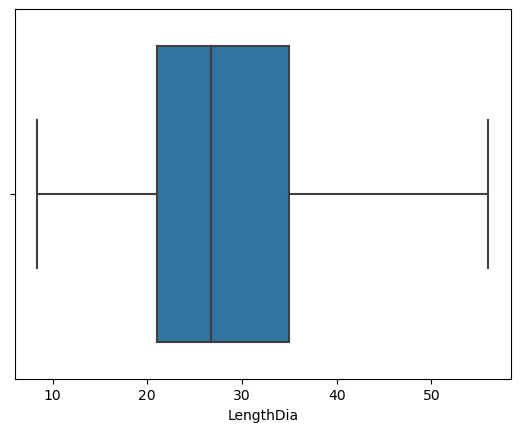

In [14]:
sns.boxplot(x=df1['LengthDia']);

 # 3. Build a regression model and print regression equation?

In [15]:
# Dependant (Target) Variable:
y=  df1['Weight']
#Independent variable
x= df1.iloc[:,2:7]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(x_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(x_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [18]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.0088725388189
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


# 4. What is the mean score of the model at  95% confidence interval?

In [20]:
y_pred = reg.predict(x_test)

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg,x_train,y_train,cv=5,scoring='r2')

In [23]:
print(cross_val_score_train)

[0.89119112 0.93859621 0.92572295 0.88550794 0.83504798]


In [24]:
cross_val_score_train.mean()

0.8952132388952405